#### 切分数据集

In [ ]:
from sklearn.model_selection import train_test_split

# 假设你有一个特征矩阵 X 和一个标签向量 y

# 切分数据集为训练集和测试集，其中 test_size 参数表示测试集所占的比例
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 再将训练集进一步切分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#### 遗传算法

In [3]:
# decimal to binary

def decimal_to_binary(decimal):
    binary = ""
    
    if decimal == 0:
        return "0"
    
    while decimal > 0:
        remainder = decimal % 2
        binary = str(remainder) + binary
        decimal = decimal // 2
    
    return binary


result = decimal_to_binary(22)
result

'10110'

In [5]:
def binary_to_decimal(binary):
    decimal = 0
    power = 0
    
    while binary > 0:
        digit = binary % 10
        decimal += digit * (2 ** power)
        binary //= 10
        power += 1
    
    return decimal

result = binary_to_decimal(10110)
result

22

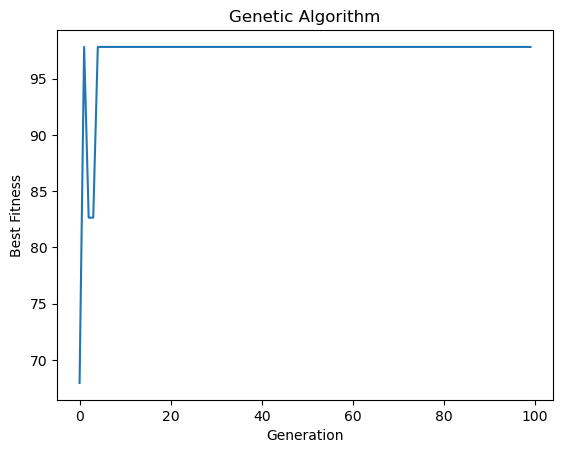

Best Individual: [1 1 1 1 1 1 1 1 1 1]
Best Fitness: 97.82391555644251


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 定义目标函数
def fitness_function(x):
    return x**2 + 4*np.sin(x)

# 定义遗传算法参数
population_size = 50
chromosome_length = 10
mutation_rate = 0.01
num_generations = 100

# 初始化种群
population = np.random.randint(0, 2, size=(population_size, chromosome_length))

# 定义存储适应度值的列表
fitness_history = []

# 迭代进化
for generation in range(num_generations):
    # 计算适应度值
    fitness_values = fitness_function(population.sum(axis=1))
    
    # 存储最优适应度值
    best_fitness = np.max(fitness_values)
    fitness_history.append(best_fitness)
    
    # 选择操作
    selected_indices = np.random.choice(
        np.arange(population_size),
        size=population_size,
        replace=True,
        p=fitness_values/fitness_values.sum()
    )
    selected_population = population[selected_indices]
    
    # 交叉操作
    crossover_point = np.random.randint(1, chromosome_length)
    offspring_population = np.empty_like(selected_population)
    for i in range(population_size):
        parent1 = selected_population[i]
        parent2 = selected_population[(i+1) % population_size]
        offspring1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        offspring2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
        offspring_population[i] = offspring1 if np.random.rand() < 0.5 else offspring2
    
    # 变异操作
    mutation_mask = np.random.rand(population_size, chromosome_length) < mutation_rate
    offspring_population[mutation_mask] = 1 - offspring_population[mutation_mask]
    
    # 更新种群
    population = offspring_population

# 绘制适应度值随迭代次数的变化
plt.plot(range(num_generations), fitness_history)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Genetic Algorithm')
plt.show()

# 计算最优解
fitness_values = fitness_function(population.sum(axis=1))
best_individual = population[np.argmax(fitness_values)]
best_fitness = np.max(fitness_values)

print("Best Individual:", best_individual)
print("Best Fitness:", best_fitness)

In [1]:
import random

# 问题的目标函数（示例为一个简单的多元函数）
def fitness_function(x):
    return sum(x)  # 最大化元素之和

# 初始化种群
def initialize_population(population_size, chromosome_length):
    population = []
    for _ in range(population_size):
        chromosome = [random.randint(0, 1) for _ in range(chromosome_length)]
        population.append(chromosome)
    return population

# 计算个体的适应度
def evaluate_fitness(population):
    fitness_scores = []
    for chromosome in population:
        decoded_chromosome = decode_chromosome(chromosome)
        fitness = fitness_function(decoded_chromosome)
        fitness_scores.append(fitness)
    return fitness_scores

# 二进制解码
def decode_chromosome(chromosome):
    decoded_chromosome = []
    for gene in chromosome:
        decoded_chromosome.append(gene)
    return decoded_chromosome

# 锦标赛选择（选择适应度较高的个体）
def tournament_selection(population, fitness_scores, tournament_size):
    selected_population = []
    for _ in range(len(population)):
        tournament = random.sample(range(len(population)), tournament_size)
        winner = max(tournament, key=lambda x: fitness_scores[x])
        selected_population.append(population[winner])
    return selected_population

# 单点交叉操作
def crossover(population, crossover_rate):
    offspring = []
    for i in range(0, len(population), 2):
        parent1 = population[i]
        parent2 = population[i+1]
        if random.random() < crossover_rate:
            crossover_point = random.randint(1, len(parent1)-1)
            child1 = parent1[:crossover_point] + parent2[crossover_point:]
            child2 = parent2[:crossover_point] + parent1[crossover_point:]
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring

# 突变操作
def mutation(population, mutation_rate):
    for i in range(len(population)):
        for j in range(len(population[i])):
            if random.random() < mutation_rate:
                population[i][j] = 1 - population[i][j]  # 随机位翻转
    return population

# 主程序
def genetic_algorithm(population_size, chromosome_length, tournament_size,
                      crossover_rate, mutation_rate, generations):
    # 初始化种群
    population = initialize_population(population_size, chromosome_length)

    for _ in range(generations):
        # 评估适应度
        fitness_scores = evaluate_fitness(population)

        # 选择操作
        population = tournament_selection(population, fitness_scores, tournament_size)

        # 遗传操作：交叉和变异
        population = crossover(population, crossover_rate)
        population = mutation(population, mutation_rate)

    # 返回最优个体
    best_individual = max(population, key=lambda x: fitness_function(decode_chromosome(x)))
    return decode_chromosome(best_individual)

# 参数设置
population_size = 100
chromosome_length = 10
tournament_size = 5
crossover_rate = 0.8
mutation_rate = 0.1
generations = 100

# 运行遗传算法
best_solution = genetic_algorithm(population_size, chromosome_length, tournament_size,
                                 crossover_rate, mutation_rate, generations)

# 输出结果
print("Best Solution:", best_solution)
print("Fitness Score:", fitness_function(best_solution))

Best Solution: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness Score: 10


#### 梯度下降法

In [ ]:
import numpy as np

def gradient_descent(X, y, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)  # 初始化参数为0向量

    for iteration in range(num_iterations):
        # 计算预测值
        y_pred = np.dot(X, theta)

        # 计算误差
        error = y_pred - y

        # 计算梯度
        gradient = np.dot(X.T, error) / num_samples

        # 更新参数
        theta = theta - learning_rate * gradient

    return theta

# 示例数据
X = np.array([[1, 3, 5], [1, 4, 6], [1, 2, 3], [1, 5, 7]])
y = np.array([5, 6, 3, 8])

# 设置学习率和迭代次数
learning_rate = 0.01
num_iterations = 1000

# 执行梯度下降算法
theta = gradient_descent(X, y, learning_rate, num_iterations)

print("最优参数：", theta)

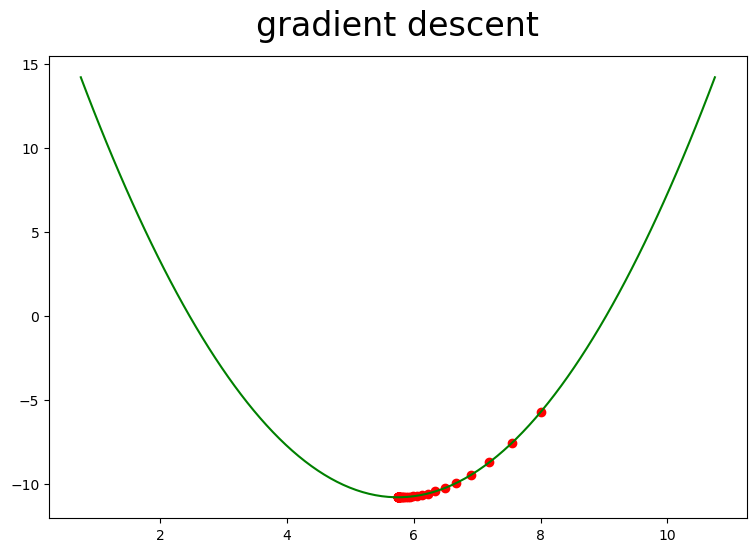

In [1]:
import numpy as np
import matplotlib.pyplot as plt
f = lambda x : (x - 3.5)**2 -4.5*x + 10
# 导函数
d = lambda x :2*(x - 3.5) - 4.5 # 梯度 == 导数
# 梯度下降的步幅，比例，（学习率，幅度）
step = 0.1
# 求解当x等于多少的时候，函数值最小。求解目标值：随机生成的
# 相等于：'瞎蒙' ----> 方法 ----> 优化
x = np.random.randint(0,12,size = 1)[0]
# 梯度下降，每下降一步，每走一步，目标值，都会更新。
# 更新的这个新值和上一步的值，差异，如果差异很小（万分之一）
# 梯度下降退出
last_x = x + 0.02 # 记录上一步的值，首先让last_x和x有一定的差异！！！
# 精确率，真实计算，都是有误差，自己定义
precision = 1e-4
x_ = [x]

while True:
    # 退出条件，精确度，满足了
    if np.abs(x - last_x) < precision:
        break     
    # 更新
    last_x = x
    x -= step*d(x) # 更新，减法：最小值
    x_.append(x)

# 数据可视化
plt.figure(figsize=(9,6))
x = np.linspace(5.75 - 5, 5.75 + 5, 100)
y = f(x)
plt.plot(x,y,color = 'green')
plt.title('gradient descent',size = 24,pad = 15)
x_ = np.array(x_)
y_ = f(x_)
plt.scatter(x_, y_,color = 'red')

#### 批量梯度下降BGD

In [2]:
import numpy as np

# 1、创建数据集X，y
X = np.random.rand(100, 1)
w,b = np.random.randint(1,10,size = 2)
y = w * X  + b + np.random.randn(100, 1)

# 2、使用偏置项x_0 = 1，更新X
X = np.c_[X,np.ones((100, 1))]

# 3、创建超参数轮次
epoches = 10000

# 4、定义一个函数来调整学习率
t0, t1 = 5, 1000
def learning_rate_schedule(t):
    return t0/(t+t1)

# 5、初始化 W0...Wn，标准正太分布创建W
θ = np.random.randn(2, 1)

# 6、判断是否收敛，一般不会去设定阈值，而是直接采用设置相对大的迭代次数保证可以收敛
for i in range(epoches):
    # 根据公式计算梯度
    g = X.T.dot(X.dot(θ) - y)
    # 应用梯度下降的公式去调整 θ 值
    learning_rate = learning_rate_schedule(i)
    θ = θ - learning_rate * g
print('真实斜率和截距是：',w,b)
print('梯度下降计算斜率和截距是：',θ)

真实斜率和截距是： 8 7
梯度下降计算斜率和截距是： [[8.05751884]
 [6.94504376]]


#### 随机梯度下降SGD

In [3]:
# 1、创建数据集X，y
X = 2*np.random.rand(100, 1)
w,b = np.random.randint(1,10,size = 2)
y = w * X + b + np.random.randn(100, 1)

# 2、使用偏置项x_0 = 1，更新X
X = np.c_[X, np.ones((100, 1))]

# 3、创建超参数轮次、样本数量
epochs = 10000
n = 100

# 4、定义一个函数来调整学习率
t0, t1 = 5, 500
def learning_rate_schedule(t):
    return t0/(t+t1)

# 5、初始化 W0...Wn，标准正太分布创建W
θ = np.random.randn(2, 1)

# 6、多次for循环实现梯度下降，最终结果收敛
for epoch in range(epochs):
    # 在双层for循环之间，每个轮次开始分批次迭代之前打乱数据索引顺序
    index = np.arange(n) # 0 ~99
    np.random.shuffle(index)
    X = X[index] # 打乱顺序
    y = y[index]
    for i in range(n):
        X_i = X[[i]]
        y_i = y[[i]]
        g = X_i.T.dot(X_i.dot(θ)-y_i)
        learning_rate = learning_rate_schedule(epoch*n + i)
        θ = θ - learning_rate * g
print('真实斜率和截距是：',w,b)
print('梯度下降计算斜率和截距是：',θ)

真实斜率和截距是： 9 5
梯度下降计算斜率和截距是： [[8.73580166]
 [5.35103724]]


#### 小批量梯度下降MBGD

In [25]:
import numpy as np

# 1、创建数据集X，y
X = np.random.rand(100, 1)
w,b = np.random.randint(1,10,size = 2)
y = w * X + b + np.random.randn(100, 1)

# 2、使用偏置项x_0 = 1，更新X
X = np.c_[X, np.ones((100, 1))]

# 3、定义一个函数来调整学习率
t0, t1 = 5, 500
def learning_rate_schedule(t):
    return t0/(t+t1)

# 4、创建超参数轮次、样本数量、小批量数量
epochs = 100
n = 100
batch_size = 16
num_batches = int(n / batch_size)

# 5、初始化 W0...Wn，标准正太分布创建W
θ = np.random.randn(2, 1)

# 6、多次for循环实现梯度下降，最终结果收敛
for epoch in range(epochs):
    # 在双层for循环之间，每个轮次开始分批次迭代之前打乱数据索引顺序
    index = np.arange(n)
    np.random.shuffle(index)
    X = X[index]
    y = y[index]
    for i in range(num_batches):
        # 一次取一批数据16个样本
        X_batch = X[i * batch_size : (i + 1)*batch_size]
        y_batch = y[i * batch_size : (i + 1)*batch_size]
        g = X_batch.T.dot(X_batch.dot(θ)-y_batch)
        learning_rate = learning_rate_schedule(epoch * n + i)
        θ = θ - learning_rate * g

print('真实斜率和截距是：',w,b)
print('梯度下降计算斜率和截距是：',θ)



真实斜率和截距是： 6 2
梯度下降计算斜率和截距是： [[4.71686978]
 [2.68949203]]
